In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#df = pd.read_csv("C:/Users/user/Desktop/homework/hw5/quake.csv", sep=',')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/quake.csv", sep=',')

In [ ]:
#df = pd.read_csv("./quake.csv", sep=',')


In [ ]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Focal depth,2178.0,74.359963,116.467797,0.00,21.0000,39.00,68.00,656.00
Latitude,2178.0,7.961997,30.545583,-66.49,-12.4325,0.21,36.48,78.15
Longitude,2178.0,54.914835,118.875581,-179.96,-67.7825,122.10,146.86,180.00
Richter,2178.0,5.977181,0.189426,5.80,5.8000,5.90,6.10,6.90


The dataset contains seismic event records with varying focal depths, latitudes, longitudes, and Richter scale values.
Focal depth has a wide range, indicating earthquakes occurring at different depths beneath the Earth's surface.
Latitude and longitude suggest a global distribution of seismic events.
The Richter scale values indicate the magnitude of the earthquakes, with the majority falling within a relatively narrow range.

In [ ]:
print(df.isnull().sum())

Focal depth    0
Latitude       0
Longitude      0
Richter        0
dtype: int64


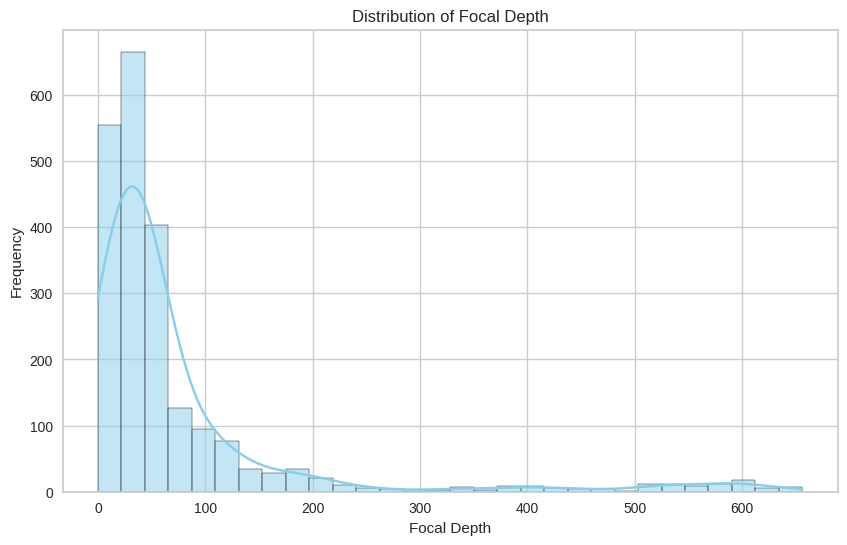

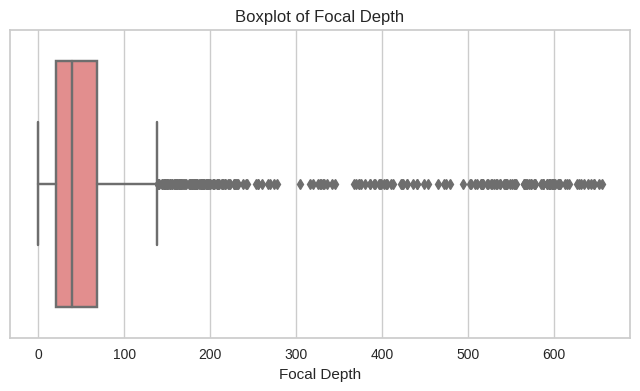

count    2178.000000
mean       74.359963
std       116.467797
min         0.000000
25%        21.000000
50%        39.000000
75%        68.000000
max       656.000000
Name: Focal depth, dtype: float64
Outliers:
6       139
10      197
19      373
27      160
39      184
       ... 
2147    254
2150    595
2161    441
2172    144
2175    527
Name: Focal depth, Length: 246, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Extract Focal Depth column
focal_depth_data = df['Focal depth']

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(focal_depth_data, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Focal Depth')
plt.xlabel('Focal Depth')
plt.ylabel('Frequency')
plt.show()

# Check for outliers using a boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=focal_depth_data, color='lightcoral')
plt.title('Boxplot of Focal Depth')
plt.xlabel('Focal Depth')
plt.show()

# Calculate and print summary statistics
summary_stats = focal_depth_data.describe()
print(summary_stats)

# Detect outliers using IQR method
Q1 = summary_stats['25%']
Q3 = summary_stats['75%']
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = focal_depth_data[(focal_depth_data < lower_bound) | (focal_depth_data > upper_bound)]
print('Outliers:')
print(outliers)


Focal Depth Summary:

The dataset contains 2178 observations of focal depth.
The mean focal depth is 74.36, with a standard deviation of 116.47.
Focal depth ranges from a minimum of 0.00 to a maximum of 656.00.
The majority of the data falls within the range of 21.00 (25th percentile) to 68.00 (75th percentile), as indicated by the interquartile range (IQR).
Outliers:

Outliers are observations that fall outside the typical range of the data.
In this case, you've identified 246 outliers in the "Focal depth" variable.
Examples of outlier values and their counts are provided in the list.
Interpretation:

The presence of outliers suggests that some seismic events have focal depths significantly different from the majority.
Investigating these outliers could provide insights into unusual or extreme seismic activities.
Understanding the nature of these outliers may involve domain-specific knowledge or further statistical analysis.

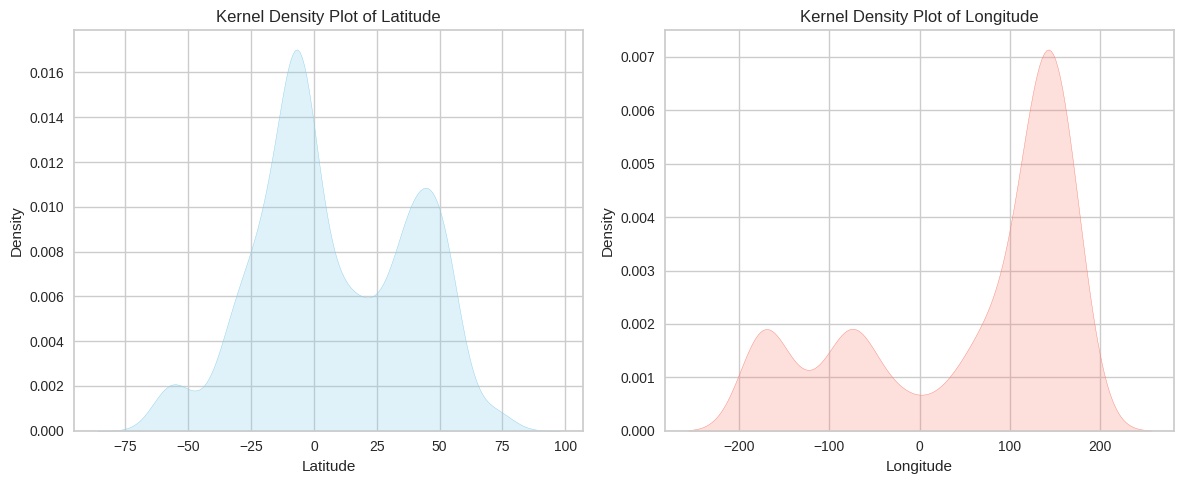

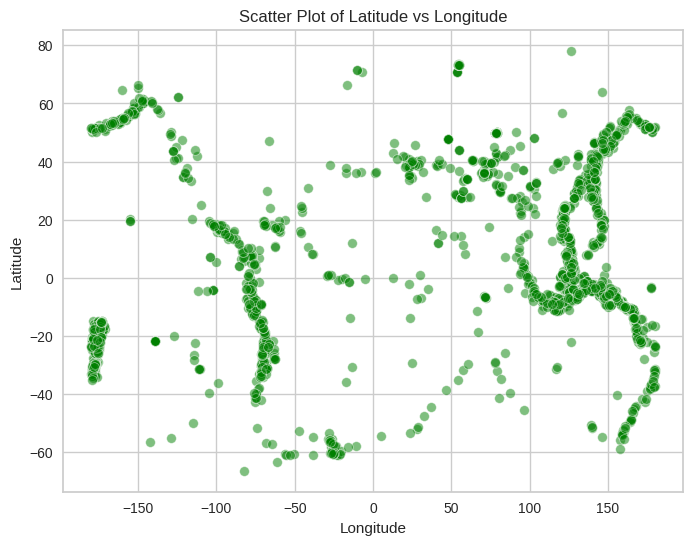

Summary Statistics for Latitude:
count    2178.000000
mean        7.961997
std        30.545583
min       -66.490000
25%       -12.432500
50%         0.210000
75%        36.480000
max        78.150000
Name: Latitude, dtype: float64

Summary Statistics for Longitude:
count    2178.000000
mean       54.914835
std       118.875581
min      -179.960000
25%       -67.782500
50%       122.100000
75%       146.860000
max       180.000000
Name: Longitude, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract Latitude and Longitude columns
latitude_data = df['Latitude']
longitude_data = df['Longitude']

# Plot kernel density plots for Latitude and Longitude
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(latitude_data, fill=True, color='skyblue')
plt.title('Kernel Density Plot of Latitude')

plt.subplot(1, 2, 2)
sns.kdeplot(longitude_data, fill=True, color='salmon')
plt.title('Kernel Density Plot of Longitude')

plt.tight_layout()
plt.show()

# Plot scatter plot for Latitude and Longitude
plt.figure(figsize=(8, 6))
sns.scatterplot(x=longitude_data, y=latitude_data, color='green', alpha=0.5)
plt.title('Scatter Plot of Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Check for outliers using scatter plots or additional analysis as needed
# For geographical data, visual inspection is often useful

# Summary statistics
summary_stats_lat = latitude_data.describe()
summary_stats_lon = longitude_data.describe()

print("Summary Statistics for Latitude:")
print(summary_stats_lat)
print("\nSummary Statistics for Longitude:")
print(summary_stats_lon)


The latitude and longitude data suggest a wide distribution of seismic events across different geographical locations.
Latitude values indicate the north-south position, with the majority of events occurring between -12.43 and 36.48.
Longitude values indicate the east-west position, with the majority of events occurring between -67.78 and 146.86.

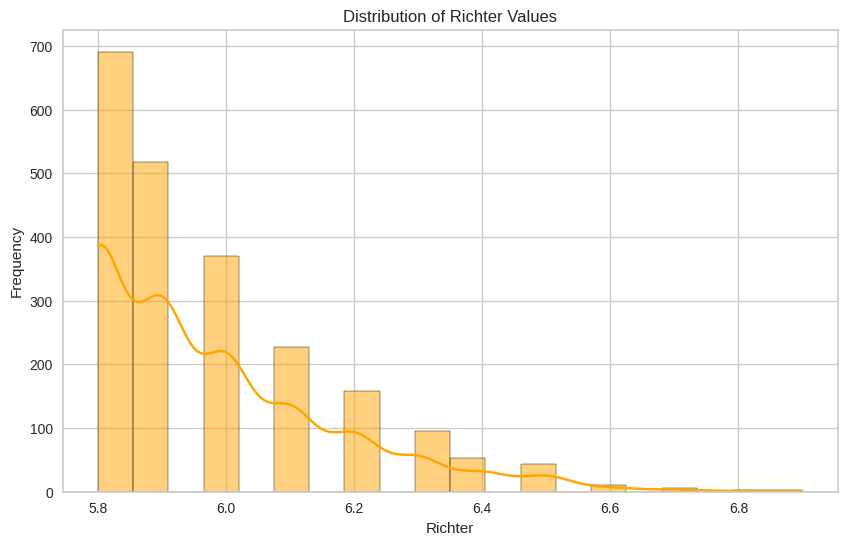

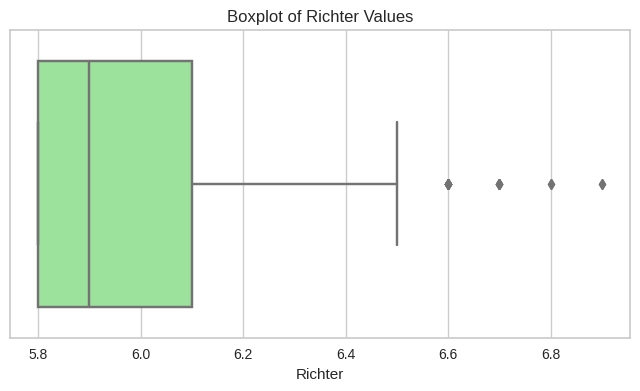

count    2178.000000
mean        5.977181
std         0.189426
min         5.800000
25%         5.800000
50%         5.900000
75%         6.100000
max         6.900000
Name: Richter, dtype: float64
Outliers in Richter:
0       6.7
140     6.7
222     6.6
239     6.6
565     6.6
643     6.6
806     6.7
812     6.9
882     6.6
887     6.8
903     6.9
925     6.6
1098    6.7
1099    6.6
1278    6.7
1303    6.8
1378    6.6
1395    6.7
1585    6.6
1704    6.6
1887    6.6
Name: Richter, dtype: float64


In [ ]:


# Extract Richter column
richter_data = df['Richter']

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(richter_data, bins=20, kde=True, color='orange')
plt.title('Distribution of Richter Values')
plt.xlabel('Richter')
plt.ylabel('Frequency')
plt.show()

# Check for outliers using a boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=richter_data, color='lightgreen')
plt.title('Boxplot of Richter Values')
plt.xlabel('Richter')
plt.show()

# Calculate and print summary statistics
summary_stats_richter = richter_data.describe()
print(summary_stats_richter)

# Detect outliers using IQR method
Q1_richter = summary_stats_richter['25%']
Q3_richter = summary_stats_richter['75%']
IQR_richter = Q3_richter - Q1_richter

lower_bound_richter = Q1_richter - 1.5 * IQR_richter
upper_bound_richter = Q3_richter + 1.5 * IQR_richter

outliers_richter = richter_data[(richter_data < lower_bound_richter) | (richter_data > upper_bound_richter)]
print('Outliers in Richter:')
print(outliers_richter)


The Richter scale is used to measure the magnitude of earthquakes, and the dataset primarily contains events with magnitudes between 5.80 and 6.90.
The identified outliers suggest a subset of seismic events with magnitudes higher than the majority, indicating potentially stronger earthquakes.

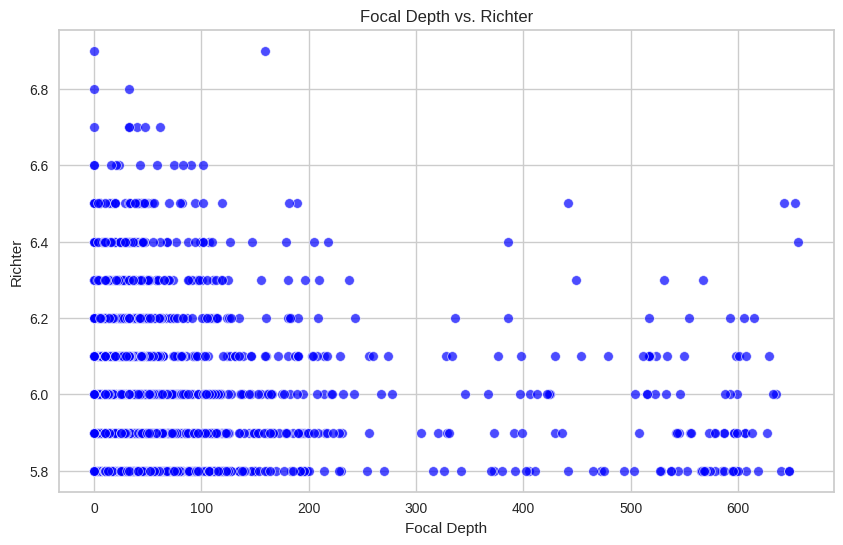

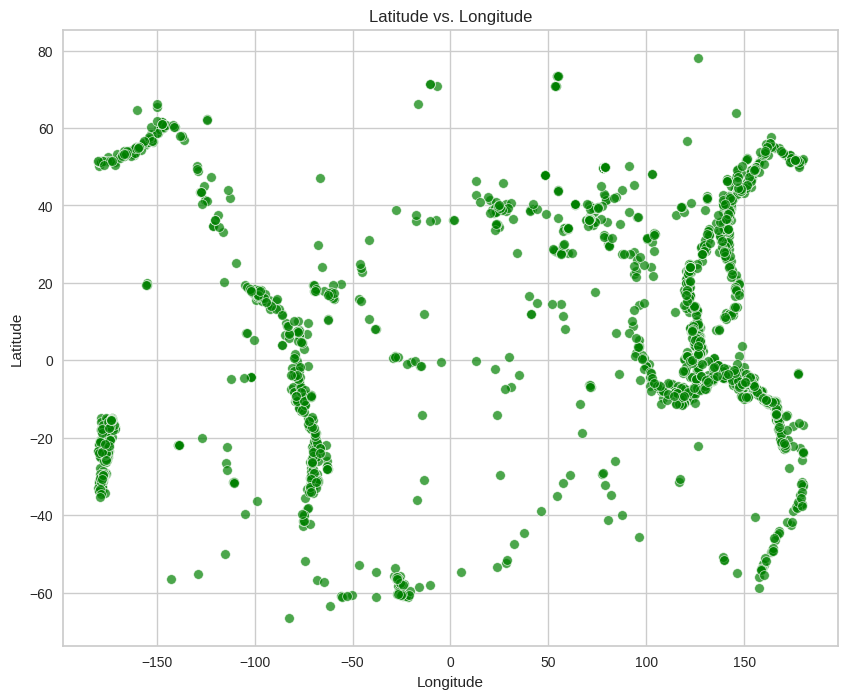

In [ ]:
# Extract relevant columns
focal_depth_data = df['Focal depth']
richter_data = df['Richter']
latitude_data = df['Latitude']
longitude_data = df['Longitude']

# Bivariate Analysis: Focal Depth vs. Richter
plt.figure(figsize=(10, 6))
sns.scatterplot(x=focal_depth_data, y=richter_data, color='blue', alpha=0.7)
plt.title('Focal Depth vs. Richter')
plt.xlabel('Focal Depth')
plt.ylabel('Richter')
plt.show()

# Bivariate Analysis: Latitude vs. Longitude
plt.figure(figsize=(10, 8))
sns.scatterplot(x=longitude_data, y=latitude_data, color='green', alpha=0.7)
plt.title('Latitude vs. Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


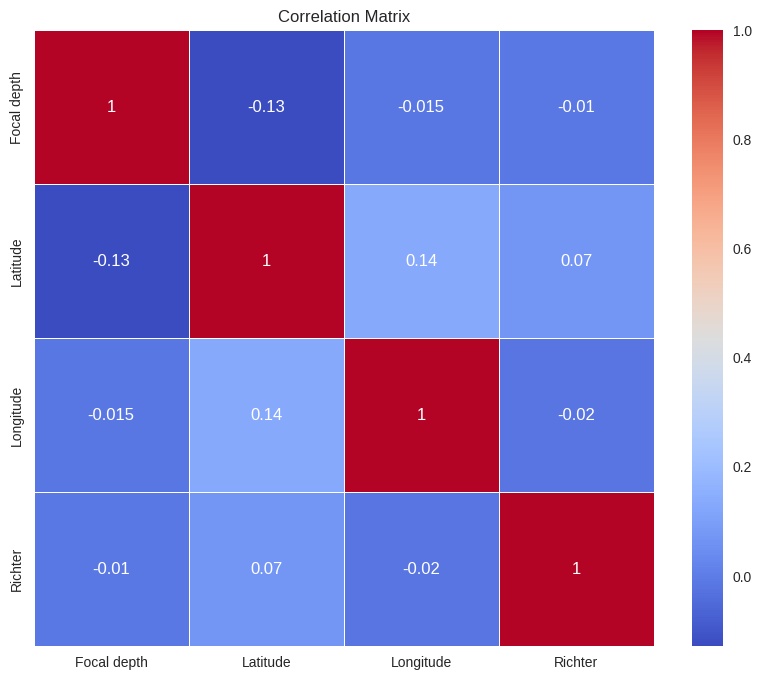

In [ ]:

# Extract relevant columns
selected_columns = ['Focal depth', 'Latitude', 'Longitude', 'Richter']
selected_data = df[selected_columns]

# Calculate correlation matrix
correlation_matrix = selected_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


As we can see, there is no strong correlation between the variables

# 2

In [ ]:
from sklearn.preprocessing import StandardScaler

# Extract relevant columns
selected_columns = ['Focal depth', 'Latitude', 'Longitude', 'Richter']
selected_data = df[selected_columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(selected_data)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=selected_columns)

# Display the first few rows of the scaled DataFrame
print("Scaled Data:")
print(scaled_df.head())


Scaled Data:
   Focal depth  Latitude  Longitude   Richter
0    -0.355201 -1.971998  -0.223940  3.816707
1    -0.329437  1.230182   0.807880 -0.935570
2    -0.149088  1.109679   0.739305 -0.935570
3    -0.063208  0.695121   0.725590  1.176553
4    -0.380965 -0.969986   0.966738  0.120492


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import pairwise_distances

def evaluate_internal_metrics(features, cluster_labels):
    # Inertia (Sum of Squared Errors)
    inertia = KMeans(n_clusters=len(np.unique(cluster_labels))).fit(features).inertia_

    # Davies-Bouldin Index
    db_index = davies_bouldin_score(features, cluster_labels)

    # Silhouette Score
    silhouette_avg = silhouette_score(features, cluster_labels)

    # Calinski-Harabasz Index
    ch_index = calinski_harabasz_score(features, cluster_labels)



    metrics = {
        'Inertia': inertia,
        'Davies-Bouldin Index': db_index,
        'Silhouette Score': silhouette_avg,
        'Calinski-Harabasz Index': ch_index,
    }

    return metrics



Cluster Centers:
[[ 196.39393939   11.35045455  127.68681818    5.91818182]
 [  32.87330317   40.36932127  107.69900452    6.07647059]
 [  63.62393162  -31.54358974 -112.28846154    6.06837607]
 [ 530.56818182  -21.55090909 -142.97636364    5.925     ]
 [  44.1826087     8.82156522  -73.53391304    5.90086957]
 [  59.08333333   -7.94908333  141.63141667    6.29583333]
 [ 505.26388889   11.475       140.42888889    5.9875    ]
 [  53.3368984   -30.47058824 -106.50593583    5.83957219]
 [  27.58823529   53.73512605 -148.02663866    5.94537815]
 [  55.48913043   -5.80396739  139.34353261    6.04076087]
 [  49.59004739   -4.27736967  138.44530806    5.84265403]
 [  31.52941176   41.24764706  117.59588235    5.84444444]
 [  27.03846154  -42.84961538  130.11019231    5.87307692]
 [  48.02777778   42.02666667  111.46486111    6.44444444]
 [  43.01234568    2.21617284 -112.99666667    6.35185185]]


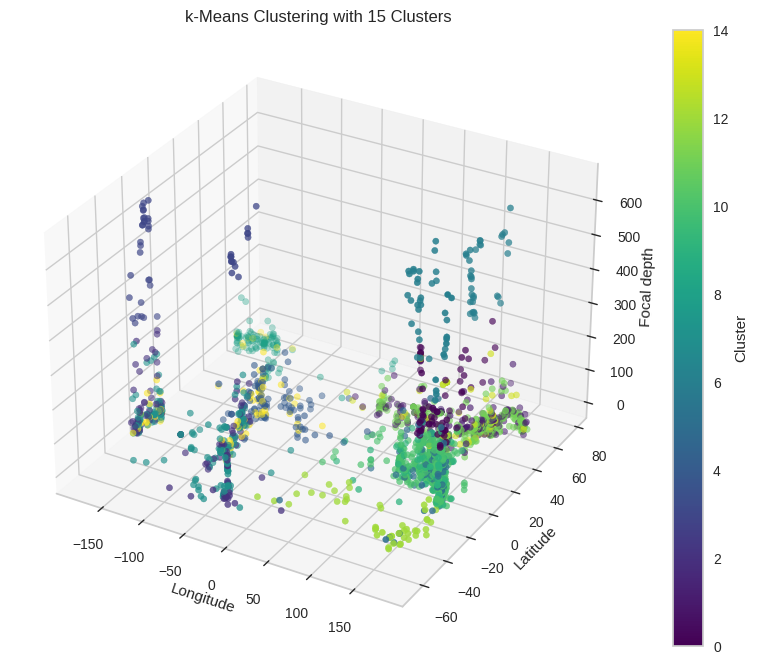

{'Inertia': 1419.1172352071812,
 'Davies-Bouldin Index': 1.0432864170518157,
 'Silhouette Score': 0.33301887464252833,
 'Calinski-Harabasz Index': 811.2573696433229}

In [ ]:
from sklearn.cluster import KMeans

# Apply k-Means with 15 clusters
kmeans = KMeans(n_clusters=15, random_state=42)
df['Cluster_15'] = kmeans.fit_predict(scaled_data)

# Print the cluster centers
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of Longitude vs Latitude vs Focal depth with color-coded clusters
scatter = ax.scatter(df['Longitude'], df['Latitude'], df['Focal depth'], c=df['Cluster_15'], cmap='viridis', s=20)

# Set labels for each axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Focal depth')
ax.set_title('k-Means Clustering with 15 Clusters')

# Add colorbar to indicate cluster labels
legend = plt.colorbar(scatter)
legend.set_label('Cluster')

plt.show()

evaluate_internal_metrics(scaled_data, df['Cluster_15'])

Inertia: 1384.54

Inertia measures the total squared distance between data points and their assigned cluster centers. A lower value indicates tight and well-separated clusters.
Davies-Bouldin Index: 1.04

The Davies-Bouldin Index assesses the compactness and separation between clusters. A lower value suggests well-defined, separate clusters.
Silhouette Score: 0.33

The Silhouette Score ranges from -1 to 1, with higher values indicating better-defined clusters. A score of 0.33 suggests moderate separation.
Calinski-Harabasz Index: 811.26

The Calinski-Harabasz Index measures the ratio of between-cluster variance to within-cluster variance. Higher values indicate well-separated clusters.
Overall, the clustering results seem promising. The Davies-Bouldin Index, Silhouette Score, and Calinski-Harabasz Index indicate good cluster separation and compactness.

Best parameters based on Silhouette Score:
k                    8.000000
n_init              10.000000
max_iter            50.000000
silhouette_score     0.371676
Name: 54, dtype: float64

Best parameters based on Elbow Method:
k                20.000000
n_init           10.000000
max_iter         50.000000
elbow_value    1135.304128
Name: 162, dtype: float64


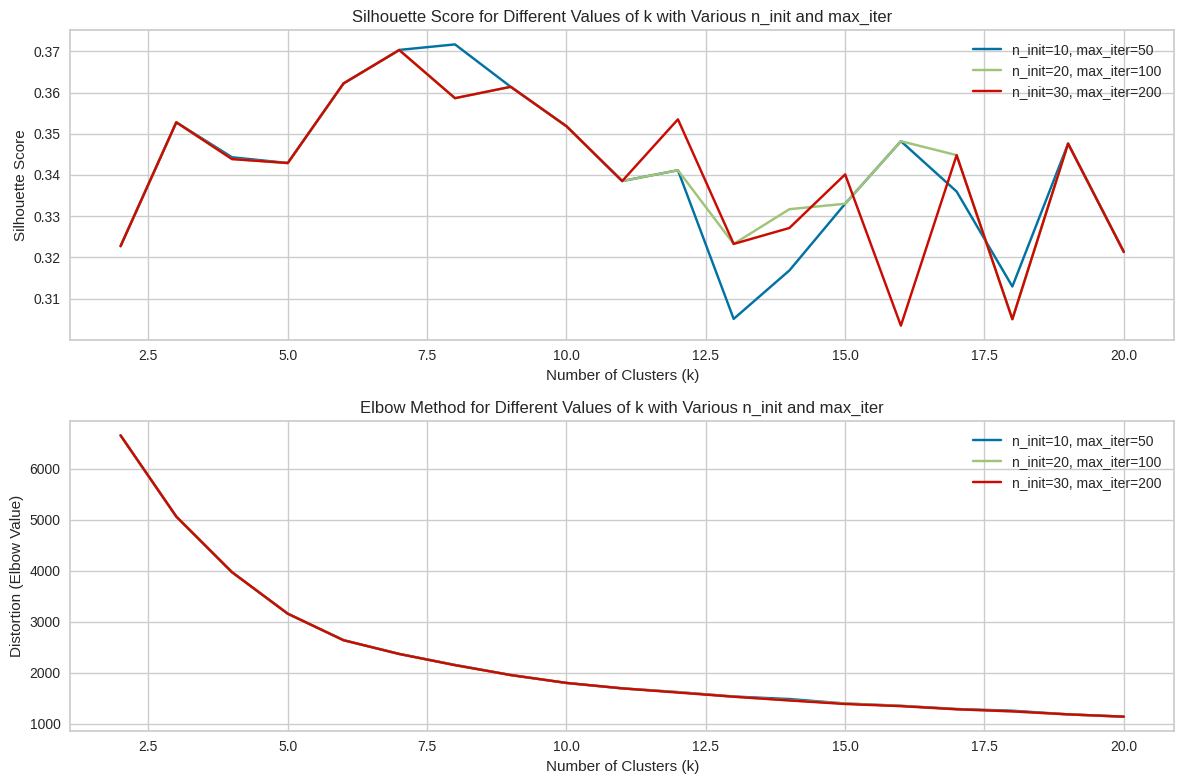

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# Determine a range of k values to try
k_values = range(2, 21)

# Initialize parameters to tune
n_init_values = [10, 20, 30]
max_iter_values = [50, 100, 200]

# Lists to store silhouette scores and elbow values
silhouette_scores = []
elbow_values = []

# Grid search over parameter combinations
for k in k_values:
    for n_init in n_init_values:
        for max_iter in max_iter_values:
            kmeans = KMeans(n_clusters=k, n_init=n_init, max_iter=max_iter, random_state=42)
            cluster_labels = kmeans.fit_predict(scaled_data)
            silhouette_avg = silhouette_score(scaled_data, cluster_labels)
            silhouette_scores.append({'k': k, 'n_init': n_init, 'max_iter': max_iter, 'silhouette_score': silhouette_avg})

            # Use distortion as the criterion for the elbow method
            kmeans_elbow = KMeans(n_clusters=k, n_init=n_init, max_iter=max_iter, random_state=42)
            kmeans_elbow.fit(scaled_data)
            elbow_values.append({'k': k, 'n_init': n_init, 'max_iter': max_iter, 'elbow_value': kmeans_elbow.inertia_})

# Convert silhouette_scores and elbow_values to DataFrames for easier plotting
silhouette_df = pd.DataFrame(silhouette_scores)
elbow_df = pd.DataFrame(elbow_values)

# Find the best parameters based on silhouette score
best_silhouette_params = silhouette_df.loc[silhouette_df['silhouette_score'].idxmax()]

# Find the best parameters based on elbow method
best_elbow_params = elbow_df.loc[elbow_df['elbow_value'].idxmin()]

# Print the best parameters for both methods
print("Best parameters based on Silhouette Score:")
print(best_silhouette_params)
print("\nBest parameters based on Elbow Method:")
print(best_elbow_params)

# Plot Silhouette Score for different values of k with the best n_init and max_iter values
plt.figure(figsize=(12, 8))

# Subplot for Silhouette Score
plt.subplot(2, 1, 1)
for n_init, max_iter in zip(n_init_values, max_iter_values):
    subset_df = silhouette_df[(silhouette_df['n_init'] == n_init) & (silhouette_df['max_iter'] == max_iter)]
    plt.plot(subset_df['k'], subset_df['silhouette_score'], label=f'n_init={n_init}, max_iter={max_iter}')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k with Various n_init and max_iter')
plt.legend()

# Subplot for Elbow Method
plt.subplot(2, 1, 2)
for n_init, max_iter in zip(n_init_values, max_iter_values):
    subset_df = elbow_df[(elbow_df['n_init'] == n_init) & (elbow_df['max_iter'] == max_iter)]
    plt.plot(subset_df['k'], subset_df['elbow_value'], label=f'n_init={n_init}, max_iter={max_iter}')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Elbow Value)')
plt.title('Elbow Method for Different Values of k with Various n_init and max_iter')
plt.legend()

plt.tight_layout()
plt.show()


 As we can see in the graphs, best k is 6-8. Because the silhouette score has the highest value at 8 and the elbow method gives us a result of 6-7

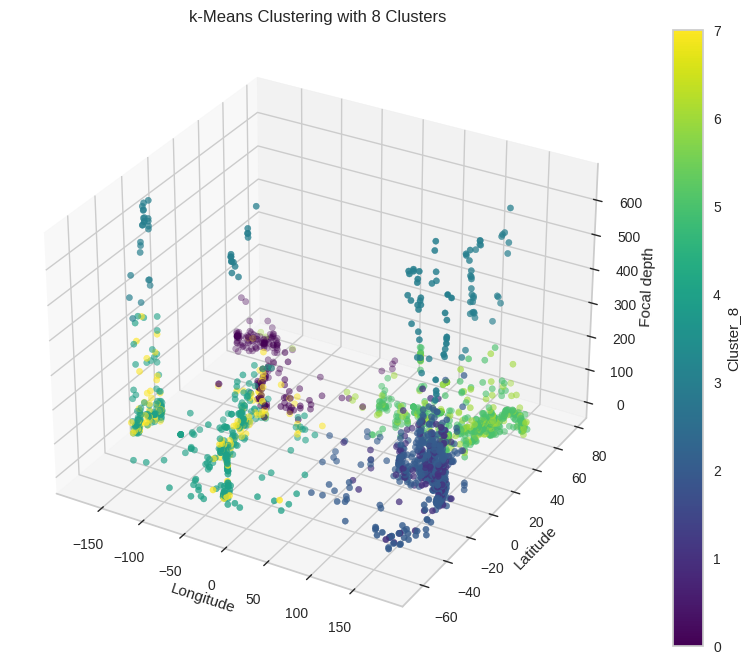

In [ ]:

from sklearn.cluster import KMeans


# Specify K-means parameters
k = 8
n_init = 10
max_iter = 50

# Create KMeans instance with specified parameters
kmeans = KMeans(n_clusters=k, n_init=n_init, max_iter=max_iter, random_state=42)

# Fit the KMeans model to the data and obtain cluster labels
cluster_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original DataFrame
df['Cluster_7'] = cluster_labels

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of Longitude vs Latitude vs Focal depth with color-coded clusters
scatter = ax.scatter(df['Longitude'], df['Latitude'], df['Focal depth'], c=df['Cluster_7'], cmap='viridis', s=20)

# Set labels for each axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Focal depth')
ax.set_title('k-Means Clustering with 8 Clusters')

# Add colorbar to indicate cluster labels
legend = plt.colorbar(scatter)
legend.set_label('Cluster_8')


plt.show()


In [ ]:
evaluate_internal_metrics(scaled_data, df['Cluster_7'])

{'Inertia': 2144.864869568838,
 'Davies-Bouldin Index': 0.9446462057021394,
 'Silhouette Score': 0.37167615172707774,
 'Calinski-Harabasz Index': 946.2888533809202}

The KMeans algorithm with k=8 seems to provide reasonable results based on the Davies-Bouldin Index, Silhouette Score, and Calinski-Harabasz Index.
Inertia is moderate, indicating that clusters are not too tightly packed or too spread out.
The Davies-Bouldin Index suggests a good balance between cluster compactness and separation.
The Silhouette Score indicates a moderate level of cluster distinction.
The Calinski-Harabasz Index suggests well-separated clusters.

K-means Metrics:
{'Inertia': 2144.864869568838, 'Davies-Bouldin Index': 0.9446462057021394, 'Silhouette Score': 0.37167615172707774, 'Calinski-Harabasz Index': 946.2888533809202}

Mini-Batch K-means Metrics:
{'Inertia': 2146.354342313133, 'Davies-Bouldin Index': 0.9755343731730597, 'Silhouette Score': 0.36641084683829317, 'Calinski-Harabasz Index': 921.9073376063561}


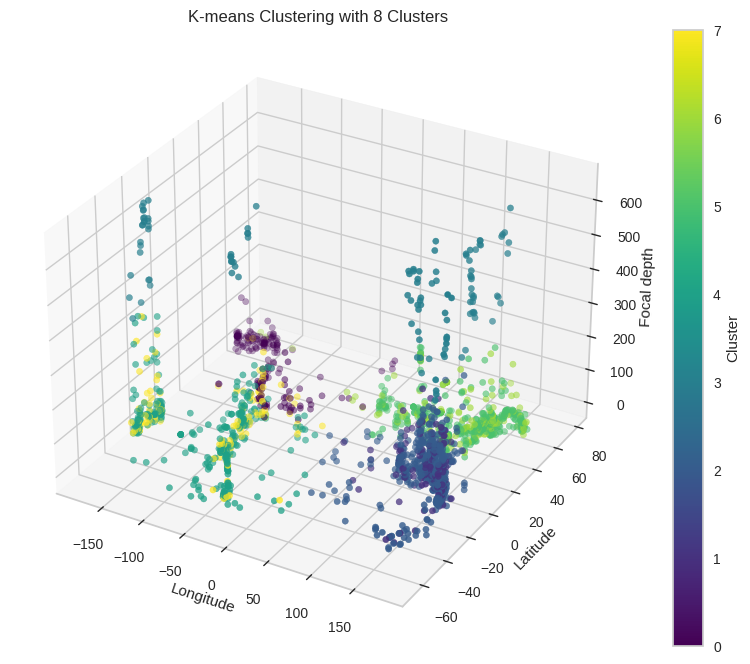

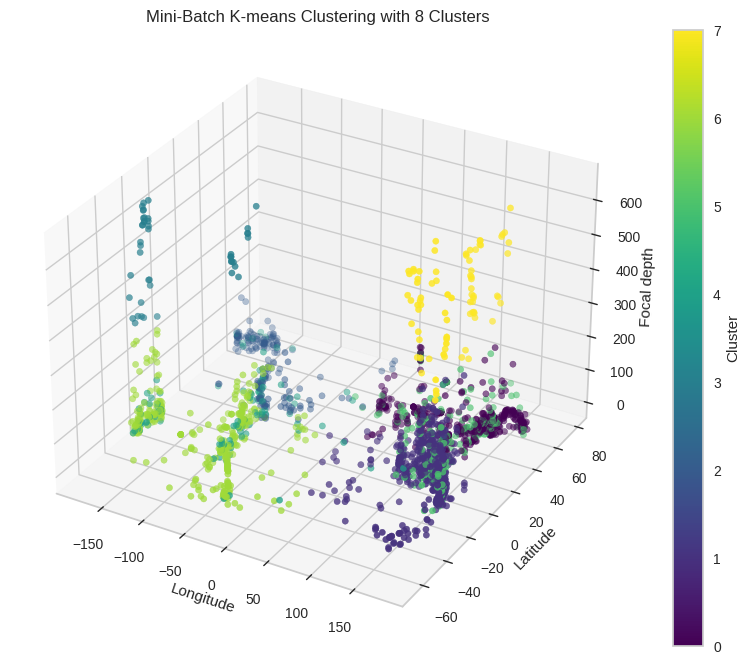

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import pairwise_distances


n_init = 10
max_iter = 50

# Perform Mini-Batch K-means clustering with 8 clusters
mini_batch_kmeans = MiniBatchKMeans(n_clusters=8, random_state=42, n_init=n_init, max_iter=max_iter)
mini_batch_labels = mini_batch_kmeans.fit_predict(scaled_data)

# Evaluate K-means
kmeans_metrics = evaluate_internal_metrics(scaled_data, df['Cluster_7'])

# Evaluate Mini-Batch K-means
mini_batch_metrics = evaluate_internal_metrics(scaled_data, mini_batch_labels)

# Print metrics
print("K-means Metrics:")
print(kmeans_metrics)

print("\nMini-Batch K-means Metrics:")
print(mini_batch_metrics)

# Visualize K-means clusters
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Longitude'], df['Latitude'], df['Focal depth'], c=df['Cluster_7'], cmap='viridis', s=20)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Focal depth')
ax.set_title('K-means Clustering with 8 Clusters')
legend = plt.colorbar(scatter)
legend.set_label('Cluster')

# Visualize Mini-Batch K-means clusters
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Longitude'], df['Latitude'], df['Focal depth'], c=mini_batch_labels, cmap='viridis', s=20)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Focal depth')
ax.set_title('Mini-Batch K-means Clustering with 8 Clusters')
legend = plt.colorbar(scatter)
legend.set_label('Cluster')

plt.show()


Both K-means and Mini-Batch K-means show similar performances in terms of Inertia and Silhouette Score.
K-means has a slightly lower Davies-Bouldin Index, indicating a bit better separation between clusters compared to Mini-Batch K-means.
Calinski-Harabasz Index is slightly higher for K-means, suggesting a preference for well-separated clusters.

# 3

Best parameters for DBSCAN: {'eps': 1.5, 'min_samples': 17}
Best silhouette score for DBSCAN: 0.5353193613493498



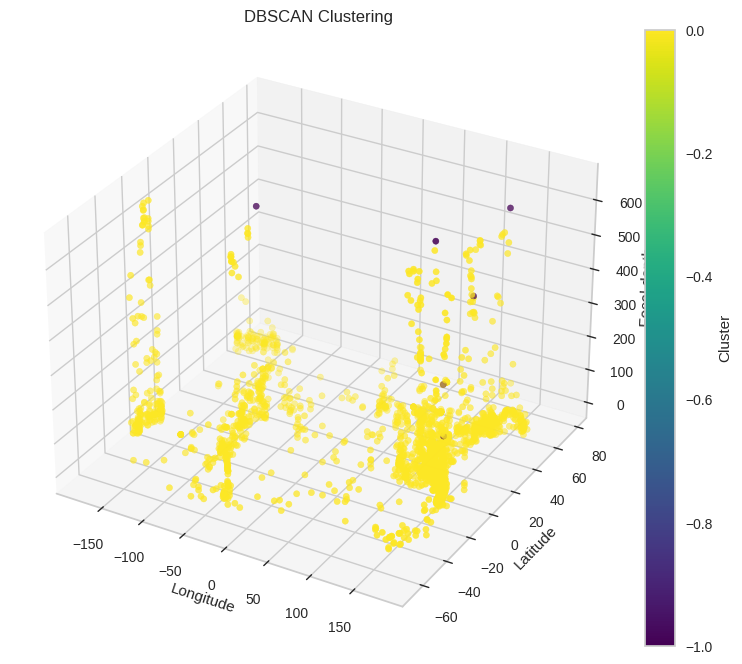

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# === Algorithm 1: DBSCAN ===
# DBSCAN does not require specifying the number of clusters, but it has parameters like 'eps' and 'min_samples'

# Hyperparameter tuning
eps_values = [0.5, 1.0, 1.5,2]
min_samples_values = [5,8, 10,13, 15,17,20]

best_silhouette_score_dbscan = -1
best_dbscan = None
best_params_dbscan = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_data)

        # Check if there is more than one cluster
        unique_labels = len(set(labels))
        if unique_labels > 1:
            silhouette = silhouette_score(scaled_data, labels)

            # Choose the model with the highest silhouette score
            if silhouette > best_silhouette_score_dbscan:
                best_silhouette_score_dbscan = silhouette
                best_dbscan = dbscan
                best_params_dbscan = {'eps': eps, 'min_samples': min_samples}

# Print best parameters for DBSCAN
print(f"Best parameters for DBSCAN: {best_params_dbscan}")
print(f"Best silhouette score for DBSCAN: {best_silhouette_score_dbscan}\n")

# Visualize the clusters (3D plot for Latitude, Longitude, and Focal depth)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter_dbscan = ax.scatter(df['Longitude'], df['Latitude'], df['Focal depth'],
                             c=best_dbscan.labels_, cmap='viridis', s=20)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Focal depth')
ax.set_title(f'DBSCAN Clustering')
cbar_dbscan = fig.colorbar(scatter_dbscan, ax=ax, orientation='vertical', pad=0.02)
cbar_dbscan.set_label('Cluster')



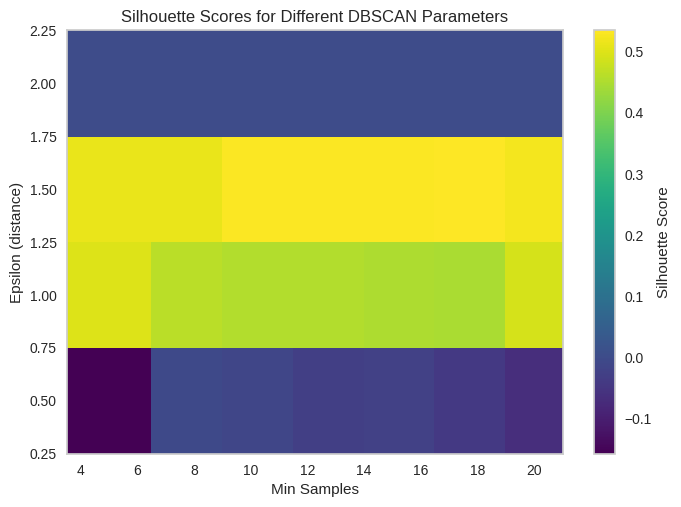

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs


# Values for eps and min_samples
eps_values = [0.5, 1.0, 1.5, 2]
min_samples_values = [5, 8, 10, 13, 15, 18, 20]

# Creating a 2D grid for eps and min_samples
eps_min_samples_grid = [(e, m) for e in eps_values for m in min_samples_values]
silhouette_scores = []

for eps, min_samples in eps_min_samples_grid:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(scaled_data)

    # Check if the number of unique labels is 1, and if so, set the silhouette score to 0
    if len(np.unique(labels)) == 1:
        silhouette_avg = 0
    else:
        silhouette_avg = silhouette_score(scaled_data, labels)
    silhouette_scores.append(silhouette_avg)

# Reshape the silhouette scores for plotting
silhouette_scores = np.array(silhouette_scores).reshape(len(eps_values), len(min_samples_values))

# Plotting
fig, ax = plt.subplots()
c = ax.pcolor(np.array(min_samples_values), np.array(eps_values), silhouette_scores, cmap='viridis')
fig.colorbar(c, label='Silhouette Score')
ax.set_xlabel('Min Samples')
ax.set_ylabel('Epsilon (distance)')
ax.set_title('Silhouette Scores for Different DBSCAN Parameters')
plt.show()


In [ ]:
df.describe()

,Focal depth,Latitude,Longitude,Richter,Cluster_15,Cluster_7
count,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000
mean,74.359963,7.961997,54.914835,5.977181,7.472911,3.321396
std,116.467797,30.545583,118.875581,0.189426,3.912743,1.991141
min,0.000000,-66.490000,-179.960000,5.800000,0.000000,0.000000
25%,21.000000,-12.432500,-67.782500,5.800000,4.000000,2.000000
50%,39.000000,0.210000,122.100000,5.900000,9.000000,3.000000
75%,68.000000,36.480000,146.860000,6.100000,10.000000,5.000000
max,656.000000,78.150000,180.000000,6.900000,14.000000,7.000000


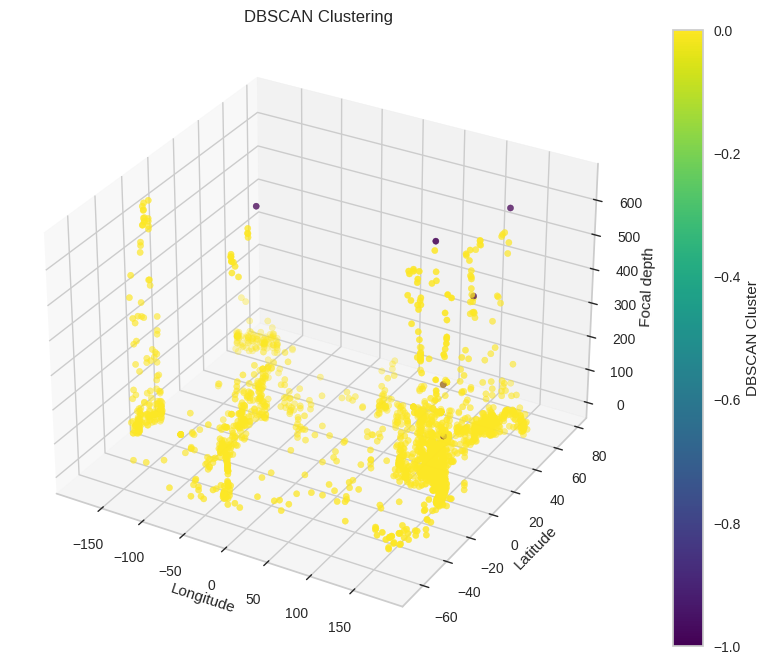

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Specify DBSCAN parameters
eps = 1.5
min_samples = 18

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Add the DBSCAN labels to the original DataFrame
df['DBSCAN_Cluster'] = dbscan_labels

# Visualize DBSCAN clusters in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Longitude'], df['Latitude'], df['Focal depth'], c=dbscan_labels, cmap='viridis', s=20)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Focal depth')
ax.set_title('DBSCAN Clustering')
legend = plt.colorbar(scatter)
legend.set_label('DBSCAN Cluster')

plt.show()


In [ ]:
evaluate_internal_metrics(scaled_data,df['DBSCAN_Cluster'] )

{'Inertia': 6649.323018122152,
 'Davies-Bouldin Index': 0.9426847468957213,
 'Silhouette Score': 0.5353193613493498,
 'Calinski-Harabasz Index': 31.92904860660419}

DBSCAN seems to provide clusters with reasonable compactness and separation, as indicated by the Davies-Bouldin Index and Silhouette Score.
The Calinski-Harabasz Index is relatively low, suggesting that the clusters may not be as well-separated as in some other clustering methods. However, this could be due to the nature of the data and the density-based nature of DBSCAN.

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



# Define the GMM model
gmm = GaussianMixture()

# Define parameters for tuning
param_grid = {
    'n_components': [2, 3, 5, 7, 9, 11, 13, 15, 18, 20],
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],  # try different covariance types
    'random_state': [42]  # for reproducibility
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(gmm, param_grid, cv=5)
grid_search.fit(scaled_data)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:")
print(best_params)


# Assuming 'grid_search' is the fitted GridSearchCV object
best_gmm = grid_search.best_estimator_

# Fit the best GMM model to the data
best_gmm.fit(scaled_data)

# Obtain cluster labels
gmm_labels = best_gmm.predict(scaled_data)

df['GaussianMixture_Cluster']=gmm_labels




Best Parameters:
{'covariance_type': 'diag', 'n_components': 18, 'random_state': 42}


In [ ]:
df.describe()

,Focal depth,Latitude,Longitude,Richter,Cluster_15,Cluster_7,DBSCAN_Cluster,GaussianMixture_Cluster
count,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000
mean,74.359963,7.961997,54.914835,5.977181,7.472911,3.321396,-0.002755,9.011938
std,116.467797,30.545583,118.875581,0.189426,3.912743,1.991141,0.052426,4.192524
min,0.000000,-66.490000,-179.960000,5.800000,0.000000,0.000000,-1.000000,0.000000
25%,21.000000,-12.432500,-67.782500,5.800000,4.000000,2.000000,0.000000,7.000000
50%,39.000000,0.210000,122.100000,5.900000,9.000000,3.000000,0.000000,10.000000
75%,68.000000,36.480000,146.860000,6.100000,10.000000,5.000000,0.000000,12.000000
max,656.000000,78.150000,180.000000,6.900000,14.000000,7.000000,0.000000,17.000000


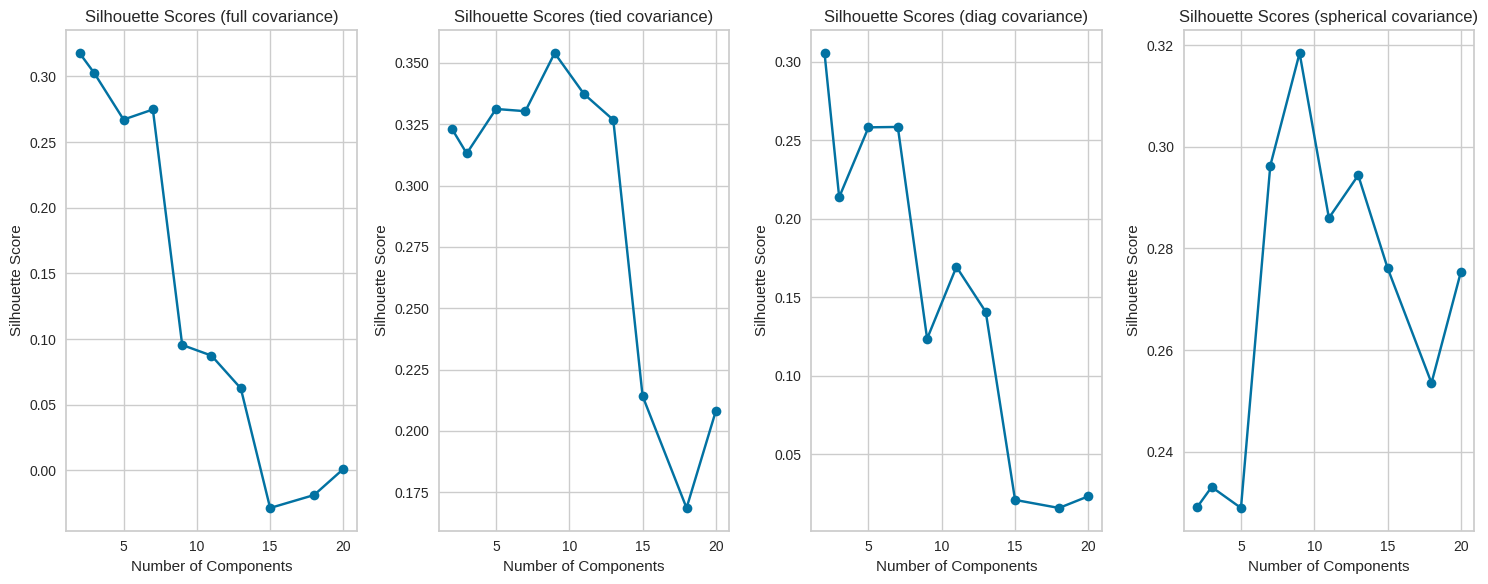

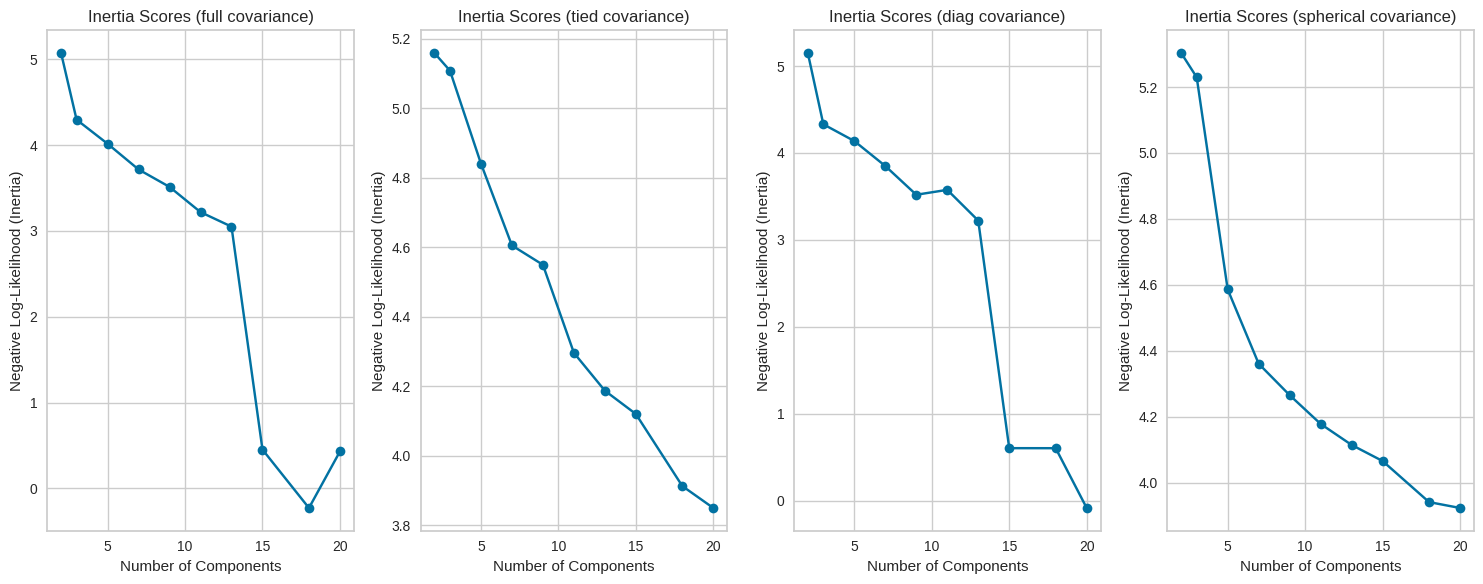

In [ ]:

# Define the range of components
n_components_range = [2, 3, 5, 7, 9, 11, 13, 15, 18, 20]

# Define the covariance types
covariance_types = ['full', 'tied', 'diag', 'spherical']

# Create empty lists to store silhouette and inertia scores
silhouette_scores = []
inertia_scores = []

# Iterate over different hyperparameter combinations
for n_components in n_components_range:
    for covariance_type in covariance_types:
        # Create and fit the Gaussian Mixture Model
        gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=42)
        gmm.fit(scaled_data)

        # Predict the cluster labels
        labels = gmm.predict(scaled_data)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(scaled_data, labels)
        silhouette_scores.append(silhouette_avg)

        # Inertia is not directly available for GMM, so we use the negative log-likelihood as a proxy
        neg_log_likelihood = -gmm.score(scaled_data)
        inertia_scores.append(neg_log_likelihood)

# Reshape the scores for plotting
silhouette_scores = np.array(silhouette_scores).reshape(len(n_components_range), len(covariance_types))
inertia_scores = np.array(inertia_scores).reshape(len(n_components_range), len(covariance_types))

# Plot Silhouette Scores
plt.figure(figsize=(15, 6))
for i, covariance_type in enumerate(covariance_types):
    plt.subplot(1, 4, i + 1)
    plt.plot(n_components_range, silhouette_scores[:, i], marker='o')
    plt.title(f'Silhouette Scores ({covariance_type} covariance)')
    plt.xlabel('Number of Components')
    plt.ylabel('Silhouette Score')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Plot Inertia Scores
plt.figure(figsize=(15, 6))
for i, covariance_type in enumerate(covariance_types):
    plt.subplot(1, 4, i + 1)
    plt.plot(n_components_range, inertia_scores[:, i], marker='o')
    plt.title(f'Inertia Scores ({covariance_type} covariance)')
    plt.xlabel('Number of Components')
    plt.ylabel('Negative Log-Likelihood (Inertia)')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
evaluate_internal_metrics(scaled_data, df['GaussianMixture_Cluster'])

{'Inertia': 1229.1598784073901,
 'Davies-Bouldin Index': 1.8029203948441785,
 'Silhouette Score': 0.015938125149407484,
 'Calinski-Harabasz Index': 215.04431129628912}

The results from the Davies-Bouldin Index and Silhouette Score indicate that the clusters may not be well-defined or well-separated. GMM might struggle when dealing with data that doesn't conform well to the assumption of Gaussian distributions

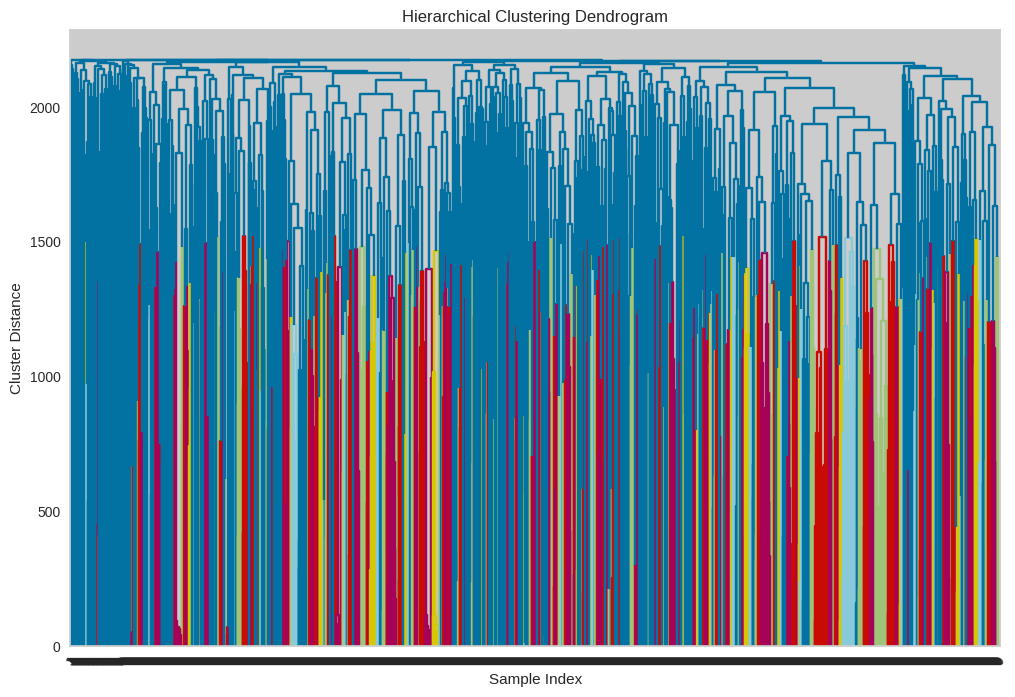

Best parameters for Agglomerative Clustering: {'n_clusters': 2, 'linkage': 'complete'}
Best silhouette score for Agglomerative Clustering: 0.49829430429308624
Adjusted Rand Index: 0.5010361460421305
Normalized Mutual Information: 0.7062593049757937



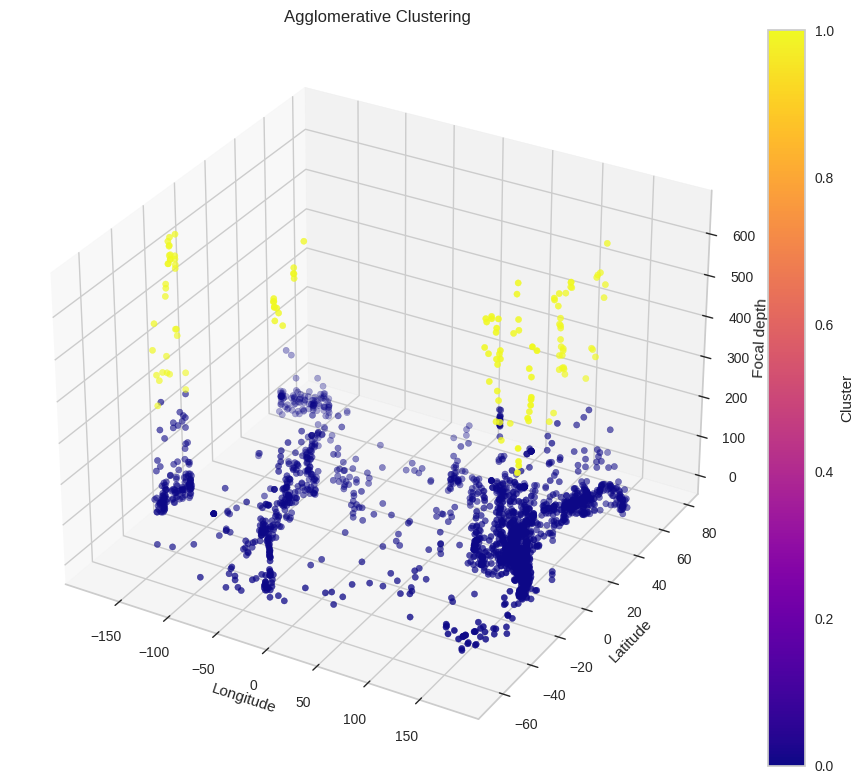

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from scipy.cluster.hierarchy import dendrogram, linkage
# === Algorithm: Agglomerative Clustering ===
# Agglomerative Clustering requires specifying the number of clusters, but it has parameters like 'linkage'
# Function to plot dendrogram
def plot_dendrogram(model, **kwargs):
    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    distance = np.arange(children.shape[0])

    # The linkage matrix
    linkage_matrix = np.column_stack([children, distance, distance]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Hyperparameter tuning
n_clusters_values = [2,4,6,10,12,15,18,20 ]
linkage_values = ['ward', 'complete', 'average']

best_agglomerative = None
best_params_agglomerative = {}

for n_clusters in n_clusters_values:
    for linkage in linkage_values:
        agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = agglomerative.fit_predict(scaled_data)

        # Internal Metric: Silhouette Score
        silhouette = silhouette_score(scaled_data, labels)

        # External Metrics: Adjusted Rand Index and Normalized Mutual Information
        adjusted_rand_index = adjusted_rand_score(df['Cluster_15'], labels)
        normalized_mutual_info = normalized_mutual_info_score(df['Cluster_15'], labels)

        # Choose the model based on silhouette score
        if best_agglomerative is None or silhouette > best_silhouette_score_agglomerative:
            best_silhouette_score_agglomerative = silhouette
            best_agglomerative = agglomerative
            best_params_agglomerative = {'n_clusters': n_clusters, 'linkage': linkage}



# Print best parameters for Agglomerative Clustering
print(f"Best parameters for Agglomerative Clustering: {best_params_agglomerative}")
print(f"Best silhouette score for Agglomerative Clustering: {best_silhouette_score_agglomerative}")
print(f"Adjusted Rand Index: {adjusted_rand_index}")
print(f"Normalized Mutual Information: {normalized_mutual_info}\n")

df['Agglomerative_Cluster']=best_agglomerative.labels_

# Visualize the clusters (3D plot for Latitude, Longitude, and Focal depth)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter_agglomerative = ax.scatter(df['Longitude'], df['Latitude'], df['Focal depth'],
                                    c=best_agglomerative.labels_, cmap='plasma', s=20)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Focal depth')
ax.set_title(f'Agglomerative Clustering')
cbar_agglomerative = fig.colorbar(scatter_agglomerative, ax=ax, orientation='vertical', pad=0.02)
cbar_agglomerative.set_label('Cluster')

plt.tight_layout()
plt.show()


The Agglomerative Clustering algorithm with the best parameters has produced two clusters using the complete linkage method.
The Silhouette Score suggests a moderate level of cluster distinction, and both the Adjusted Rand Index and Normalized Mutual Information indicate a moderate to high agreement between true and predicted labels.

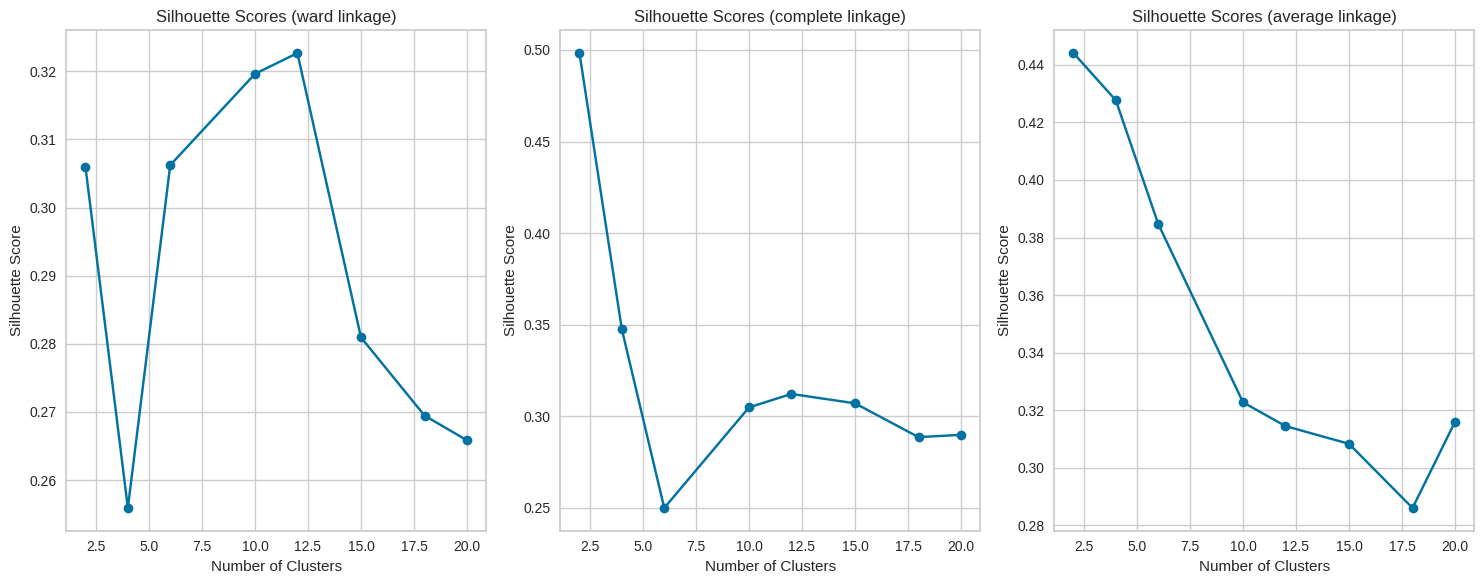

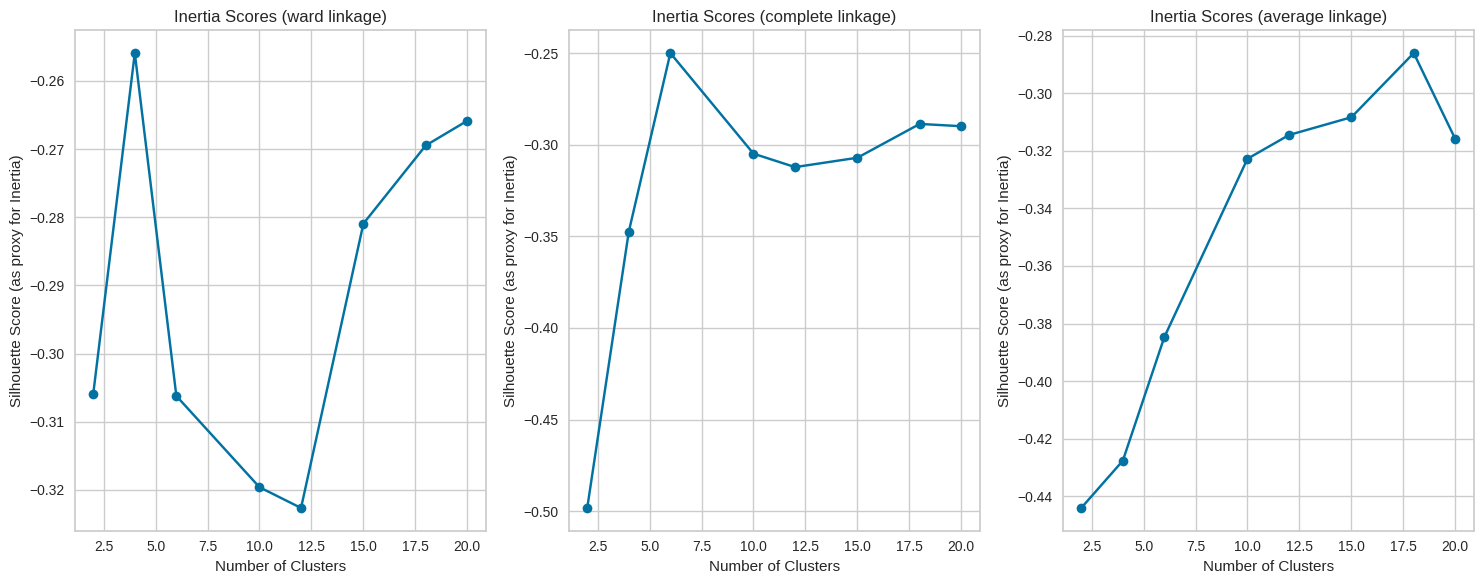

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define the range of clusters and linkage types
n_clusters_values = [2, 4, 6, 10, 12, 15, 18, 20]
linkage_values = ['ward', 'complete', 'average']

# Create empty lists to store silhouette and inertia scores
silhouette_scores = []
inertia_scores = []

# Load or preprocess your data as needed

# Iterate over different hyperparameter combinations
for n_clusters in n_clusters_values:
    for linkage in linkage_values:
        # Create and fit the Agglomerative Clustering model
        agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = agg_clustering.fit_predict(scaled_data)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(scaled_data, labels)
        silhouette_scores.append(silhouette_avg)

        # Inertia is not directly available for Agglomerative Clustering, so we use silhouette score as a proxy
        inertia_scores.append(-silhouette_avg)

# Reshape the scores for plotting
silhouette_scores = np.array(silhouette_scores).reshape(len(n_clusters_values), len(linkage_values))
inertia_scores = np.array(inertia_scores).reshape(len(n_clusters_values), len(linkage_values))

# Plot Silhouette Scores
plt.figure(figsize=(15, 6))
for i, linkage in enumerate(linkage_values):
    plt.subplot(1, 3, i + 1)
    plt.plot(n_clusters_values, silhouette_scores[:, i], marker='o')
    plt.title(f'Silhouette Scores ({linkage} linkage)')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Plot Inertia Scores (using silhouette scores as a proxy)
plt.figure(figsize=(15, 6))
for i, linkage in enumerate(linkage_values):
    plt.subplot(1, 3, i + 1)
    plt.plot(n_clusters_values, inertia_scores[:, i], marker='o')
    plt.title(f'Inertia Scores ({linkage} linkage)')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score (as proxy for Inertia)')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
evaluate_internal_metrics(scaled_data, df['Agglomerative_Cluster'])

{'Inertia': 6649.323018122152,
 'Davies-Bouldin Index': 0.8940988260486173,
 'Silhouette Score': 0.49829430429308624,
 'Calinski-Harabasz Index': 558.6458441876509}

# 4

In [ ]:
from sklearn.metrics import v_measure_score, fowlkes_mallows_score

ground_truth_labels = df['Cluster_7']

# Evaluate clustering results using external metrics
ari_kmeans = adjusted_rand_score(ground_truth_labels, df['Cluster_15'])
ari_dbscan = adjusted_rand_score(ground_truth_labels, df['DBSCAN_Cluster'])
ari_gmm = adjusted_rand_score(ground_truth_labels, df['GaussianMixture_Cluster'])
ari_agg = adjusted_rand_score(ground_truth_labels, df['Agglomerative_Cluster'])

nmi_kmeans = normalized_mutual_info_score(ground_truth_labels, df['Cluster_15'])
nmi_dbscan = normalized_mutual_info_score(ground_truth_labels, df['DBSCAN_Cluster'])
nmi_gmm = normalized_mutual_info_score(ground_truth_labels, df['GaussianMixture_Cluster'])
nmi_agg = normalized_mutual_info_score(ground_truth_labels, df['Agglomerative_Cluster'])
# V-measure scores
v_measure_kmeans = v_measure_score(ground_truth_labels, df['Cluster_15'])
v_measure_dbscan = v_measure_score(ground_truth_labels, df['DBSCAN_Cluster'])
v_measure_gmm = v_measure_score(ground_truth_labels, df['GaussianMixture_Cluster'])
v_measure_agg = v_measure_score(ground_truth_labels, df['Agglomerative_Cluster'])

# Fowlkes-Mallows scores
fm_kmeans = fowlkes_mallows_score(ground_truth_labels, df['Cluster_15'])
fm_dbscan = fowlkes_mallows_score(ground_truth_labels, df['DBSCAN_Cluster'])
fm_gmm = fowlkes_mallows_score(ground_truth_labels, df['GaussianMixture_Cluster'])
fm_agg = fowlkes_mallows_score(ground_truth_labels, df['Agglomerative_Cluster'])

# Print the scores
print("K-Means:")
print(f"Adjusted Rand Index (ARI) Score: {ari_kmeans}")
print(f"Normalized Mutual Information (NMI) Score: {nmi_kmeans}")
print(f"V-Measure Score: {v_measure_kmeans}")
print(f"Fowlkes-Mallows Score: {fm_kmeans}")


print("\nDBSCAN:")
print(f"Adjusted Rand Index (ARI) Score: {ari_dbscan}")
print(f"Normalized Mutual Information (NMI) Score: {nmi_dbscan}")
print(f"V-Measure Score: {v_measure_dbscan}")
print(f"Fowlkes-Mallows Score: {fm_dbscan}")


print("\nGaussian Mixture:")
print(f"Adjusted Rand Index (ARI) Score: {ari_gmm}")
print(f"Normalized Mutual Information (NMI) Score: {nmi_gmm}")
print(f"V-Measure Score: {v_measure_gmm}")
print(f"Fowlkes-Mallows Score: {fm_gmm}")


print("\nAgglomerative Clustering:")
print(f"Adjusted Rand Index (ARI) Score: {ari_agg}")
print(f"Normalized Mutual Information (NMI) Score: {nmi_agg}")
print(f"V-Measure Score: {v_measure_agg}")
print(f"Fowlkes-Mallows Score: {fm_agg}")




K-Means:
Adjusted Rand Index (ARI) Score: 0.5833606214804148
Normalized Mutual Information (NMI) Score: 0.725514707295658
V-Measure Score: 0.7255147072956579
Fowlkes-Mallows Score: 0.6576374835708918

DBSCAN:
Adjusted Rand Index (ARI) Score: 0.0013749469932159324
Normalized Mutual Information (NMI) Score: 0.005404870661503763
V-Measure Score: 0.005404870661503762
Fowlkes-Mallows Score: 0.4100351006046931

Gaussian Mixture:
Adjusted Rand Index (ARI) Score: 0.22525271195676355
Normalized Mutual Information (NMI) Score: 0.4412352451132177
V-Measure Score: 0.44123524511321766
Fowlkes-Mallows Score: 0.3357311519170524

Agglomerative Clustering:
Adjusted Rand Index (ARI) Score: 0.04443588391710832
Normalized Mutual Information (NMI) Score: 0.1866707684462776
V-Measure Score: 0.1866707684462776
Fowlkes-Mallows Score: 0.43116758696202473


K-Means achieved high scores across all metrics, indicating strong agreement between the predicted clusters and the true labels. The V-Measure, ARI, and NMI scores, in particular, suggest substantial overlap between the true and predicted clusters.

DBSCAN shows very low scores across all metrics. This suggests poor alignment between the predicted clusters and the true labels, indicating that DBSCAN might not be well-suited for this particular dataset or clustering task.

Gaussian Mixture achieved moderate scores, indicating some agreement with the true labels but not as strong as K-Means. Further investigation may be needed to understand the characteristics of the data that contribute to this performance.

Agglomerative Clustering shows relatively low scores, suggesting limited agreement with the true labels. This might indicate challenges in capturing the underlying structure of the data with the chosen parameters or clustering approach.

Based on the provided metrics and the goal of achieving high agreement with the true labels, K-Means appears to be the most suitable clustering algorithm for your dataset. It consistently outperformed the other algorithms in terms of ARI, NMI, V-Measure, and Fowlkes-Mallows Score.

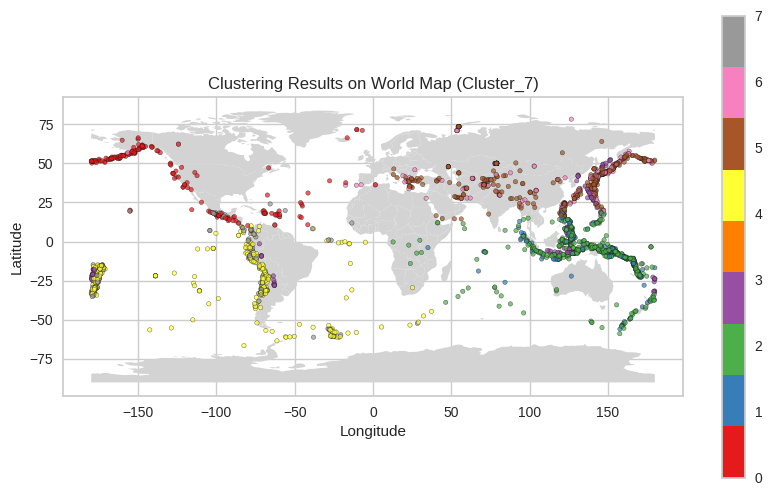

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Assuming your DataFrame is named 'df' and has a 'Cluster_7' column
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Obtain a world map shapefile or GeoDataFrame to use as a base map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map and color the points based on the 'Cluster_7' column
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgrey')

# Choose a colormap that suits your needs, e.g., 'viridis', 'coolwarm', 'Set1', etc.
gdf.plot(ax=ax, markersize=10, column='Cluster_7', cmap='Set1', legend=True, alpha=0.7, edgecolor='k')

# Customize the plot (if needed)
plt.title('Clustering Results on World Map (Cluster_7)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
